## Load and Dimensionally Reduce data using Classical Multiview Multidimensional Scaling (MVMDS)

In [23]:
from multiview.datasets.base import load_UCImultifeature
from multiview.embed.mvmds import MVMDS
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

### Load Data

In [8]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

In [9]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


### MVMDS Views Without Noise

In [ ]:
# Create MVMDS object and create lower components
mvmds = MVMDS()
Components = mvmds.fit(Xs, n_components=6)

### Plot Averaged Latent Spaces

Text(0.5, 1.0, 'Embeddings of the Average of Five Views')

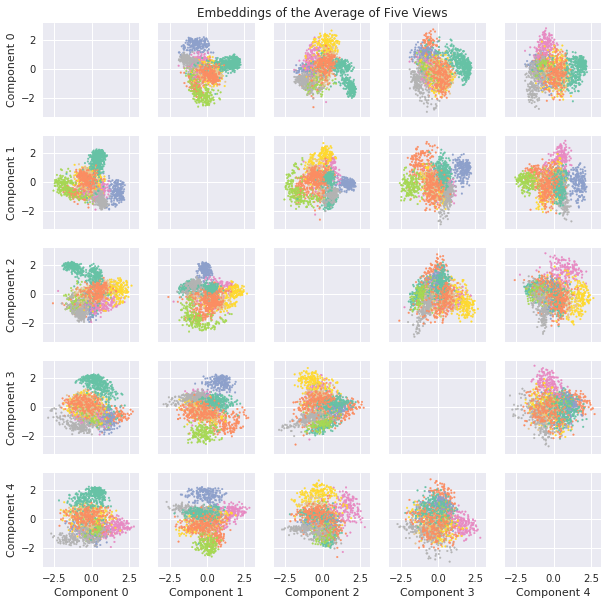

In [240]:
plt.style.use('seaborn')

color_map_scatter = [sns.color_palette("Set2", 10)[int(i)] for i in y]
color_map_hist = [sns.color_palette("Set2", 10)[int(i)] for i in np.unique(y)]

fig, axes = plt.subplots(6,6,figsize=(10,10), sharey=True, sharex=True)

for i in range(len(Xs)):
    for j in range(len(Xs)):
        if not i == j:
            axes[i,j].scatter(x=Components[:,i], y=Components[:,j], alpha=1, label=y, color=color_map_scatter, s=3)
        axes[4,j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')
    
ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('MVMDS Components Compared')